# Question Three

The purpose of this optimization problem is when given a series of 50 random points, we want to try to get all of the points encapsulated in a circle but with has small of a radius as possible. Much like any other optimization problem our scope is given data X, make Y as small as possible. 

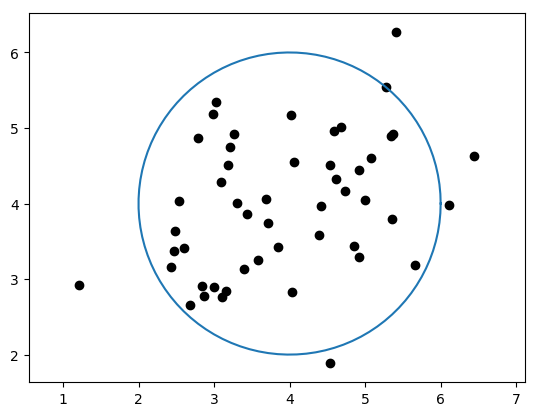

(0.9174975003699081, 6.738688776492456, 1.6336654147179117, 6.52648172444354)

In [2]:
using PyPlot
X = 4 .+ randn(2,50)
t = range(0,stop=2pi,length=100)
r = 2; x1 = 4; x2 = 4 # center of circle
plot(x1 .+ r*cos.(t), x2 .+ r*sin.(t))
scatter(X[1,:], X[2,:], color="black")
axis("equal")

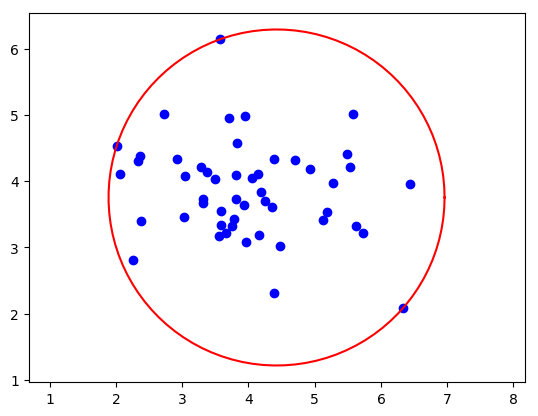

Academic license - for non-commercial use only
X-Coordinate Center: 4.424108579626616
Y-Coordinate Center: 3.7517100645556956
Radius Squared: 2.535825938093228


(1.6360405626516876, 7.213453277484994, 0.9626526419935683, 6.540767487117823)

In [4]:
using JuMP, Gurobi

numPts = 50

# generate random points first
X = 4 .+ randn(2, numPts)

# do optimization
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, xCenter)   # x coordinate of the circle center
@variable(m, yCenter)   # y coordinate of the circle center
@variable(m, R)    # radius^2 the circle

for i in 1:numPts
    @constraint(m, (X[1,i]-xCenter)^2 + (X[2,i]-yCenter)^2 <= R)
end

@objective(m, Min, R)

solve(m)
xCenter = getvalue(xCenter)
yCenter = getvalue(yCenter)
r = sqrt(getvalue(R))
println("X-Coordinate Center: ", xCenter)
println("Y-Coordinate Center: ", yCenter)
println("Radius Squared: ", r)

# plot
plot(xCenter .+ r*cos.(t), yCenter .+ r*sin.(t), color="red")
scatter(X[1,:], X[2,:], color="blue")
axis("equal")